<a href="https://colab.research.google.com/github/Nahom32/DNN-Simulation/blob/main/DNN_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Neural Networks
This notebook contains an illustration of how the deep neural networks work. It implements how both forward and backward propagation works using the gradient descent algorithm.

The forward propagation algorithm works as follows:
$$Z^l = W^la^{l-1} + b^l$$
$$a^l = \alpha(Z^l)$$ where $\alpha$ is the activation function
The backward propagation algorithms uses gradient descent to autocorrect the weights. The algorihtm works as follows:
$$W^l = W^l - \frac{∂E}{∂W^l}$$

Since the Error equation isn't described interms of the internal weights, we need to use the chain rule to find the partial derivative.





## Imports


In [11]:
import numpy as np
import pandas as pd


In [12]:
def relu(x):
  '''
  Description
  ---------------------------
  This is the relu activation function which is mostly used in hidden layers
  ===========================
  args:
    x: flloat, np.matrix
  returns:
    np.matrix
  '''
  return np.maximum(x,0)

def softmax(x):
    x_val = np.exp(x - np.max(x, axis=1, keepdims=True))
    return x_val / np.sum(x_val, axis=1, keepdims=True)

def sigmoid(x):
  '''
  Description
  ---------------------------
  This is the sigmoid activation function
  ===========================
  args:
    x: flloat, np.matrix
  returns:
    np.matrix
  '''
  return 1/(1+np.exp(-x))




In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

The MNIST (The modified National Institute of Standards and Technology) is a dataset used for benchmarking purposes in image classification tasks. It contains datasets that contain handwritten digits from 0 to 9.

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255


## Activation Function Benchmarking
The following will implement a DNN with a variaty of activation functions used in Deep Neural Networks. This includes the **Leaky ReLU**, **ReLU**, **Sigmoid** and **Swish**


In [15]:
def dnn(activation,optimizer_fn):
  model = Sequential([
      Flatten(input_shape=(28,28)),
      Dense(256,activation=activation),
      Dense(128, activation=activation),
      Dense(10,activation='softmax')
  ])
  model.compile(optimizer=optimizer_fn,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

Activation Function: tanh
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8886 - loss: 0.3712 - val_accuracy: 0.9614 - val_loss: 0.1268
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9644 - loss: 0.1160 - val_accuracy: 0.9686 - val_loss: 0.1002
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9780 - loss: 0.0694 - val_accuracy: 0.9730 - val_loss: 0.0900
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9835 - loss: 0.0522 - val_accuracy: 0.9734 - val_loss: 0.0824
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9755 - val_loss: 0.0796
Activation Function: relu
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8908 - loss: 0.3601 - val_accuracy: 0.9675 - val_loss: 0.1061
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9728 - loss: 0.0878 - val_accuracy: 0.9694 - val_loss: 0.1016
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━

Text(0.5, 1.0, 'Validation Accuracy per Epoch')

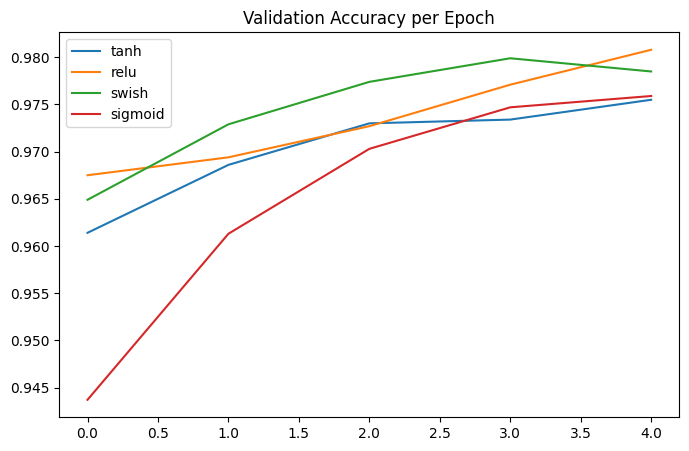

In [16]:
activation_functions = {'relu','sigmoid','swish','tanh'}
optimizer_functions = {'adam','sgd','rmsprop'}
results = {}
model_results = {}
for activation in activation_functions:
  print(f'Activation Function: {activation}')
  model = dnn(activation,'adam')
  history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))
  model_results[activation] = history
  results[activation] = history.history['val_accuracy']
plt.figure(figsize=(8, 5))
for name, history in results.items():
    plt.plot(history, label=name)
plt.legend()
plt.title('Validation Accuracy per Epoch')







In [17]:
from tensorflow.keras.layers import LeakyReLU, PReLU
def reluDNN(activation: str):
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  activation = activation.lower()
  if activation == 'prelu':
    model.add(Dense(256))
    model.add(PReLU())
    model.add(Dense(128))
    model.add(PReLU())
  elif activation == 'leakyrelu':
    model.add(Dense(256))
    model.add(LeakyReLU(alpha= 0.01))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha = 0.01))
  else:
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8939 - loss: 0.3572 - val_accuracy: 0.9656 - val_loss: 0.1076
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9752 - loss: 0.0824 - val_accuracy: 0.9691 - val_loss: 0.0920
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9825 - loss: 0.0558 - val_accuracy: 0.9740 - val_loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9862 - loss: 0.0432 - val_accuracy: 0.9797 - val_loss: 0.0694
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9901 - loss: 0.0302 - val_accuracy: 0.9756 - val_loss: 0.0875
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8944 - loss: 0.3576 - val_accuracy: 0.9621 - val_loss: 0.1175
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9714 - loss: 0.0913 - val_accuracy: 0.9707 - val_loss: 0.0911
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9823 - loss: 0.0566 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8941 - loss: 0.3550 - val_accuracy: 0.9700 - val_loss: 0.0947
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9748 - loss: 0.0843 - val_accuracy: 0.9737 - val_loss: 0.0849
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9825 - loss: 0.0548 - val_accuracy: 0.9709 - val_loss: 0.0914
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9792 - val_loss: 0.0727
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.9797 - val_loss: 0.0753


Text(0.5, 1.0, 'Validation Accuracy per Epoch')

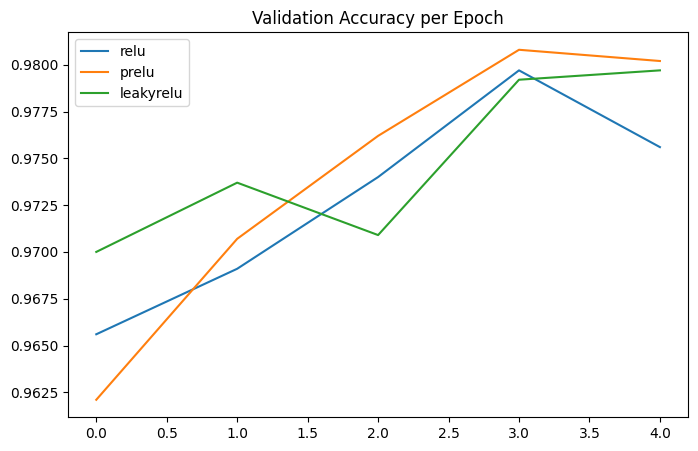

In [18]:
relu_variants = {'relu','leakyrelu','prelu'}
model_results = {}
for variant in relu_variants:
  model = reluDNN(variant)
  history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))
  model_results[variant] = history.history['val_accuracy']
plt.figure(figsize=(8, 5))
for name, history in model_results.items():
    plt.plot(history, label=name)
plt.legend()
plt.title('Validation Accuracy per Epoch')



In [21]:
def n_deep_neural_network(depth,optimize_algorithm):
  model = Sequential([Flatten(input_shape=(28,28))])
  for i in range(depth):
    model.add(Dense(256,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer= optimize_algorithm,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model


Training model with depth 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8957 - loss: 0.3745 - val_accuracy: 0.9644 - val_loss: 0.1178
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9723 - loss: 0.0967 - val_accuracy: 0.9746 - val_loss: 0.0795
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9808 - loss: 0.0612 - val_accuracy: 0.9748 - val_loss: 0.0857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9793 - val_loss: 0.0734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9910 - loss: 0.0306 - val_accuracy: 0.9771 - val_loss: 0.0727
Training model with depth 2
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8969 - loss: 0.3460 - val_accuracy: 0.9712 - val_loss: 0.0929
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9725 - loss: 0.0863 - val_accuracy: 0.9743 - val_loss: 0.0822
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accurac

Text(0.5, 1.0, 'Validation Accuracy per Epoch')

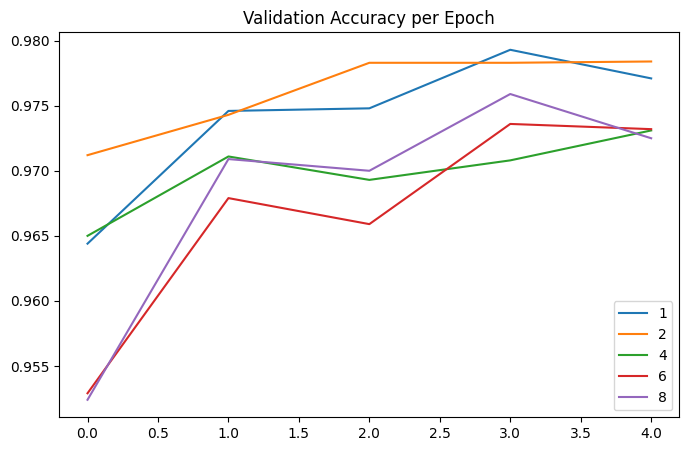

In [23]:
depth = {1,2,4,6,8}
model_results ={}
for d in depth:
  print(f"Training model with depth {d}")
  model = n_deep_neural_network(d,'adam')
  history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))
  model_results[d] = history.history['val_accuracy']
plt.figure(figsize=(8, 5))
for name, history in model_results.items():
    plt.plot(history, label=name)
plt.legend()
plt.title('Validation Accuracy per Epoch')
